# Exploratory Data Analysis (EDA) on twb.csv and twbo.csv
This section explores the batting (twb.csv) and bowling (twbo.csv) datasets to uncover key patterns and insights.

--- Batting (twb) ---
Shape: (105, 17)

Missing values (batting):
Player           0
Span             0
Mat              0
Inns             0
NO               0
Runs             0
HS               0
Ave              0
BF               0
SR               0
100              0
50               0
0                0
4s               0
6s               0
Role             0
Bowling_Type    86
dtype: int64

Summary (Runs, Ave, SR):
              Runs         Ave          SR
count   105.000000  105.000000  105.000000
mean   1436.190476   28.346190  127.827429
50%    1277.000000   27.260000  126.240000
std     582.013185    6.535691   11.891902
min     753.000000   17.920000  104.510000
max    3299.000000   52.040000  156.440000

Top 5 by Runs:
           Player  Runs   Ave     SR                Role
  MJ Guptill (NZ)  3299 32.66 136.71              Opener
  V Kohli (INDIA)  3227 52.04 137.90 Opener,Middle-order
RG Sharma (INDIA)  3197 33.30 140.28              Opener
 Babar Azam (PAK)  2620 45.

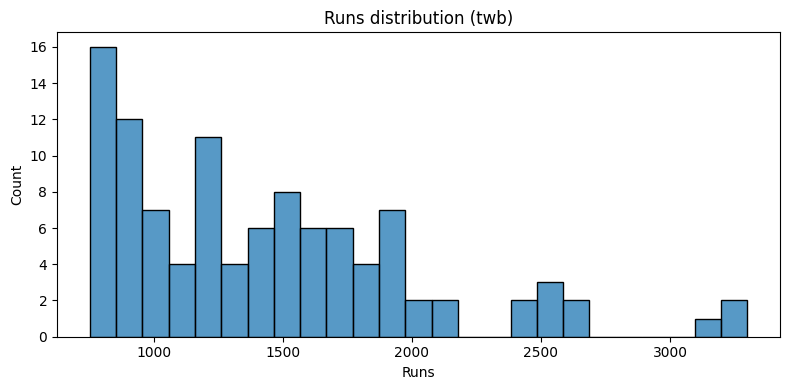

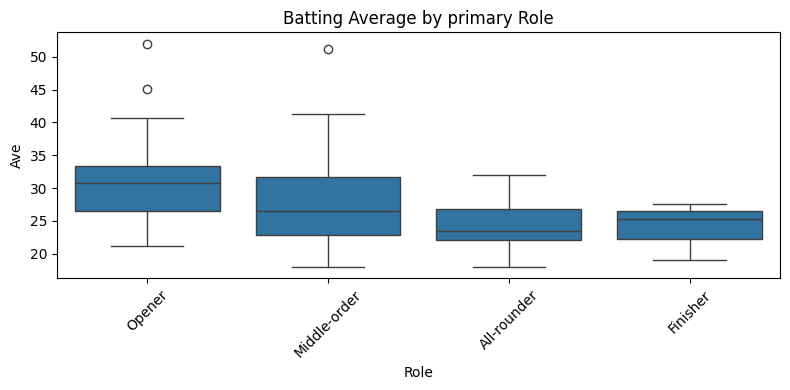


--- Bowling (twbo) ---
Shape: (181, 16)

Missing values (bowling):
Player          0
Span            0
Mat             0
Inns            0
Overs           0
Mdns            0
Runs            0
Wkts            0
BBI             0
Ave             0
Econ            0
SR              0
4               0
5               0
Bowling_Type    0
Role            0
dtype: int64

Summary (Wkts, Econ, SR):
             Wkts        Econ          SR
count  181.000000  181.000000  181.000000
mean    42.955801    7.381326   18.110497
50%     37.000000    7.280000   18.100000
std     18.355388    0.841612    3.437998
min     25.000000    5.240000   10.800000
max    117.000000    9.450000   30.200000

Top 5 by Wkts:
                 Player  Wkts  Econ   SR Bowling_Type
  Shakib Al Hasan (BAN)   117  6.66 17.8     Off spin
        TG Southee (NZ)   111  8.19 17.9         Fast
        SL Malinga (SL)   107  7.42 16.8         Fast
  Rashid Khan (AFG/ICC)   103  6.20 12.3     Leg spin
Shahid Afridi (ICC/PAK) 

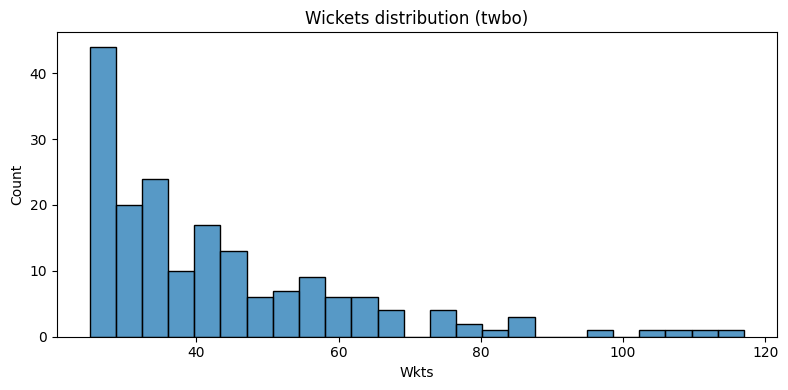


Saved small EDA plots to dataset/eda_plots/.


In [7]:
# Basic EDA: concise summaries and small plots
import os
os.makedirs('dataset/eda_plots', exist_ok=True)

print('--- Batting (twb) ---')
print('Shape:', twb.shape)
print('\nMissing values (batting):')
print(twb.isnull().sum())
print('\nSummary (Runs, Ave, SR):')
print(twb[['Runs','Ave','SR']].describe().loc[['count','mean','50%','std','min','max']])

print('\nTop 5 by Runs:')
print(twb.sort_values('Runs', ascending=False).head(5)[['Player','Runs','Ave','SR','Role']].to_string(index=False))

print('\nRole counts (primary role):')
primary_role = twb['Role'].dropna().str.split(',').str[0].str.strip()
print(primary_role.value_counts())

# Small plots
plt.figure(figsize=(8,4))
sns.histplot(twb['Runs'].dropna(), bins=25)
plt.title('Runs distribution (twb)')
plt.xlabel('Runs')
plt.tight_layout()
plt.savefig('dataset/eda_plots/runs_hist.png')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=primary_role.fillna('Unknown'), y=twb['Ave'])
plt.xticks(rotation=45)
plt.title('Batting Average by primary Role')
plt.tight_layout()
plt.savefig('dataset/eda_plots/ave_by_primary_role_box.png')
plt.show()

print('\n--- Bowling (twbo) ---')
print('Shape:', twbo.shape)
print('\nMissing values (bowling):')
print(twbo.isnull().sum())
print('\nSummary (Wkts, Econ, SR):')
print(twbo[['Wkts','Econ','SR']].describe().loc[['count','mean','50%','std','min','max']])

print('\nTop 5 by Wkts:')
print(twbo.sort_values('Wkts', ascending=False).head(5)[['Player','Wkts','Econ','SR','Bowling_Type']].to_string(index=False))

print('\nBowling Type counts:')
print(twbo['Bowling_Type'].fillna('Unknown').value_counts())

plt.figure(figsize=(8,4))
sns.histplot(twbo['Wkts'].dropna(), bins=25)
plt.title('Wickets distribution (twbo)')
plt.xlabel('Wkts')
plt.tight_layout()
plt.savefig('dataset/eda_plots/wkts_hist.png')
plt.show()

print('\nSaved small EDA plots to dataset/eda_plots/.')

In [2]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load batting and bowling data
twb = pd.read_csv("dataset/twb.csv")
twbo = pd.read_csv("dataset/twbo.csv")

## Batting Data Overview (twb.csv)

In [3]:
# Batting data head, info, describe
twb.head(), twb.info(), twb.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        105 non-null    object 
 1   Span          105 non-null    object 
 2   Mat           105 non-null    int64  
 3   Inns          105 non-null    int64  
 4   NO            105 non-null    int64  
 5   Runs          105 non-null    int64  
 6   HS            105 non-null    object 
 7   Ave           105 non-null    float64
 8   BF            105 non-null    int64  
 9   SR            105 non-null    float64
 10  100           105 non-null    int64  
 11  50            105 non-null    int64  
 12  0             105 non-null    int64  
 13  4s            105 non-null    int64  
 14  6s            105 non-null    int64  
 15  Role          105 non-null    object 
 16  Bowling_Type  19 non-null     object 
dtypes: float64(2), int64(10), object(5)
memory usage: 14.1+ KB


(              Player       Span  Mat  Inns  NO  Runs   HS    Ave    BF  \
 0    MJ Guptill (NZ)  2009-2021  112   108   7  3299  105  32.66  2413   
 1    V Kohli (INDIA)  2010-2021   95    87  25  3227  94*  52.04  2340   
 2  RG Sharma (INDIA)  2007-2021  119   111  15  3197  118  33.30  2279   
 3   Babar Azam (PAK)  2016-2021   73    68  10  2620  122  45.17  2029   
 4     AJ Finch (AUS)  2011-2021   83    83  10  2608  172  35.72  1762   
 
        SR  100  50  0   4s   6s                 Role Bowling_Type  
 0  136.71    2  20  3  287  165               Opener          NaN  
 1  137.90    0  29  3  290   91  Opener,Middle-order          NaN  
 2  140.28    4  26  7  284  150               Opener          NaN  
 3  129.12    1  25  3  272   40               Opener          NaN  
 4  148.01    2  15  7  261  113               Opener          NaN  ,
 None,
               Mat        Inns          NO         Runs         Ave  \
 count  105.000000  105.000000  105.000000   105.000000

In [4]:
# Check for missing values in batting data
twb.isnull().sum()

Player           0
Span             0
Mat              0
Inns             0
NO               0
Runs             0
HS               0
Ave              0
BF               0
SR               0
100              0
50               0
0                0
4s               0
6s               0
Role             0
Bowling_Type    86
dtype: int64

In [12]:
# Concise EDA for slides: small set of plots and short stats
import os
os.makedirs('dataset/eda_slide_imgs', exist_ok=True)

print('Batting shape:', twb.shape)
print('Bowling shape:', twbo.shape)

print('\nTop 3 batters by Runs:')
print(twb.sort_values('Runs', ascending=False).head(3)[['Player','Runs','Ave','SR']].to_string(index=False))
print('\nTop 3 bowlers by Wkts:')
print(twbo.sort_values('Wkts', ascending=False).head(3)[['Player','Wkts','Econ','SR']].to_string(index=False))

# Primary role (first token)
primary_role = twb['Role'].fillna('Unknown').str.split(',').str[0].str.strip()

# 1) Runs histogram
plt.figure(figsize=(8,4))
sns.histplot(twb['Runs'].dropna(), bins=20, color='#2b8cbe')
plt.title('Runs distribution')
plt.xlabel('Runs')
plt.tight_layout()
plt.savefig('dataset/eda_slide_imgs/runs_hist_slide.png')
plt.close()

# 2) Batting Average by primary role (boxplot)
plt.figure(figsize=(8,4))
keep = primary_role.value_counts()[primary_role.value_counts() > 1].index
sns.boxplot(x=primary_role.where(primary_role.isin(keep), 'Other'), y=twb['Ave'], palette='Set2')
plt.title('Batting Average by Role')
plt.xlabel('Role')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('dataset/eda_slide_imgs/ave_by_role_slide.png')
plt.close()

# 3) Ave vs SR (scatter)
plt.figure(figsize=(6,5))
# sample if large
plot_df = twb[['Ave','SR']].dropna()
sns.scatterplot(x='Ave', y='SR', data=plot_df, s=50, color='#f03b20')
plt.title('Avg vs Strike Rate')
plt.tight_layout()
plt.savefig('dataset/eda_slide_imgs/ave_vs_sr_slide.png')
plt.close()

# 4) Wickets histogram
plt.figure(figsize=(8,4))
sns.histplot(twbo['Wkts'].dropna(), bins=20, color='#7fc97f')
plt.title('Wickets distribution')
plt.xlabel('Wkts')
plt.tight_layout()
plt.savefig('dataset/eda_slide_imgs/wkts_hist_slide.png')
plt.close()

# 5) Bowling: Economy histogram
plt.figure(figsize=(8,4))
sns.histplot(twbo['Econ'].dropna(), bins=20, color='#6baed6')
plt.title('Bowling Economy distribution')
plt.xlabel('Econ')
plt.tight_layout()
plt.savefig('dataset/eda_slide_imgs/econ_hist_slide.png')
plt.close()

# 6) Bowling: Strike Rate histogram
plt.figure(figsize=(8,4))
sns.histplot(twbo['SR'].dropna(), bins=20, color='#b2df8a')
plt.title('Bowling Strike Rate distribution')
plt.xlabel('SR')
plt.tight_layout()
plt.savefig('dataset/eda_slide_imgs/sr_hist_slide.png')
plt.close()

# 7) Bowling type bar
plt.figure(figsize=(8,4))
bt = twbo['Bowling_Type'].fillna('Unknown').value_counts()
sns.barplot(x=bt.index, y=bt.values, palette='Set3')
plt.title('Bowling Type counts')
plt.xlabel('Bowling Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('dataset/eda_slide_imgs/bowling_type_bar_slide.png')
plt.close()

print('\nSaved 8 slide-ready images to dataset/eda_slide_imgs/')

Batting shape: (105, 17)
Bowling shape: (181, 16)

Top 3 batters by Runs:
           Player  Runs   Ave     SR
  MJ Guptill (NZ)  3299 32.66 136.71
  V Kohli (INDIA)  3227 52.04 137.90
RG Sharma (INDIA)  3197 33.30 140.28

Top 3 bowlers by Wkts:
               Player  Wkts  Econ   SR
Shakib Al Hasan (BAN)   117  6.66 17.8
      TG Southee (NZ)   111  8.19 17.9
      SL Malinga (SL)   107  7.42 16.8


/var/folders/zp/pjyf8zsn5ss9nvgqml0kr0gr0000gn/T/ipykernel_61601/1653697514.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=primary_role.where(primary_role.isin(keep), 'Other'), y=twb['Ave'], palette='Set2')



Saved 8 slide-ready images to dataset/eda_slide_imgs/


/var/folders/zp/pjyf8zsn5ss9nvgqml0kr0gr0000gn/T/ipykernel_61601/1653697514.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bt.index, y=bt.values, palette='Set3')


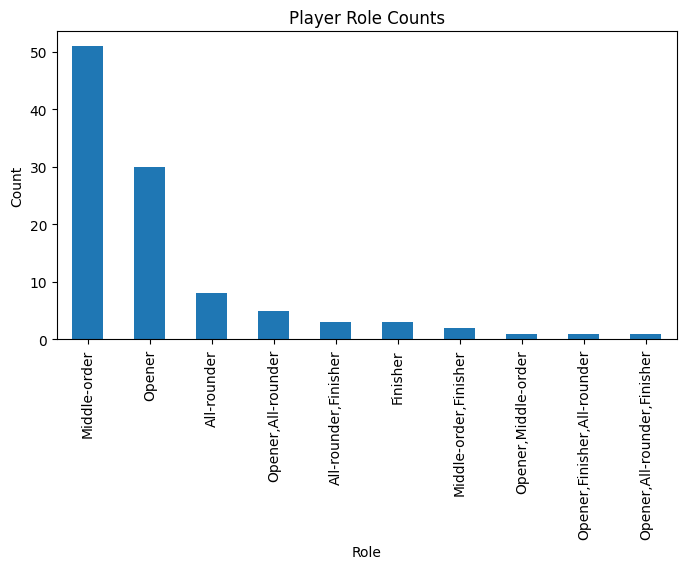

In [ ]:
# (Removed: short EDA used below for slide outputs)
pass

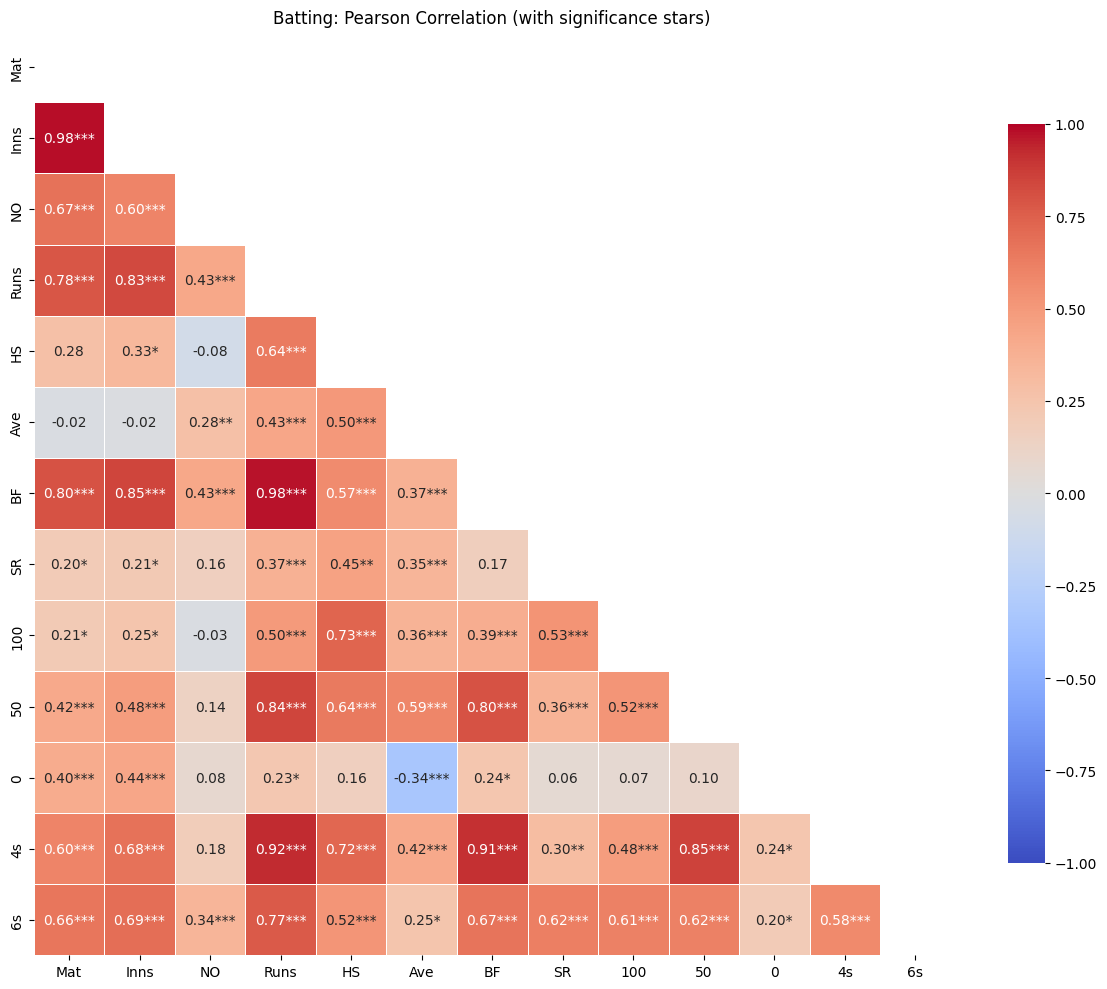

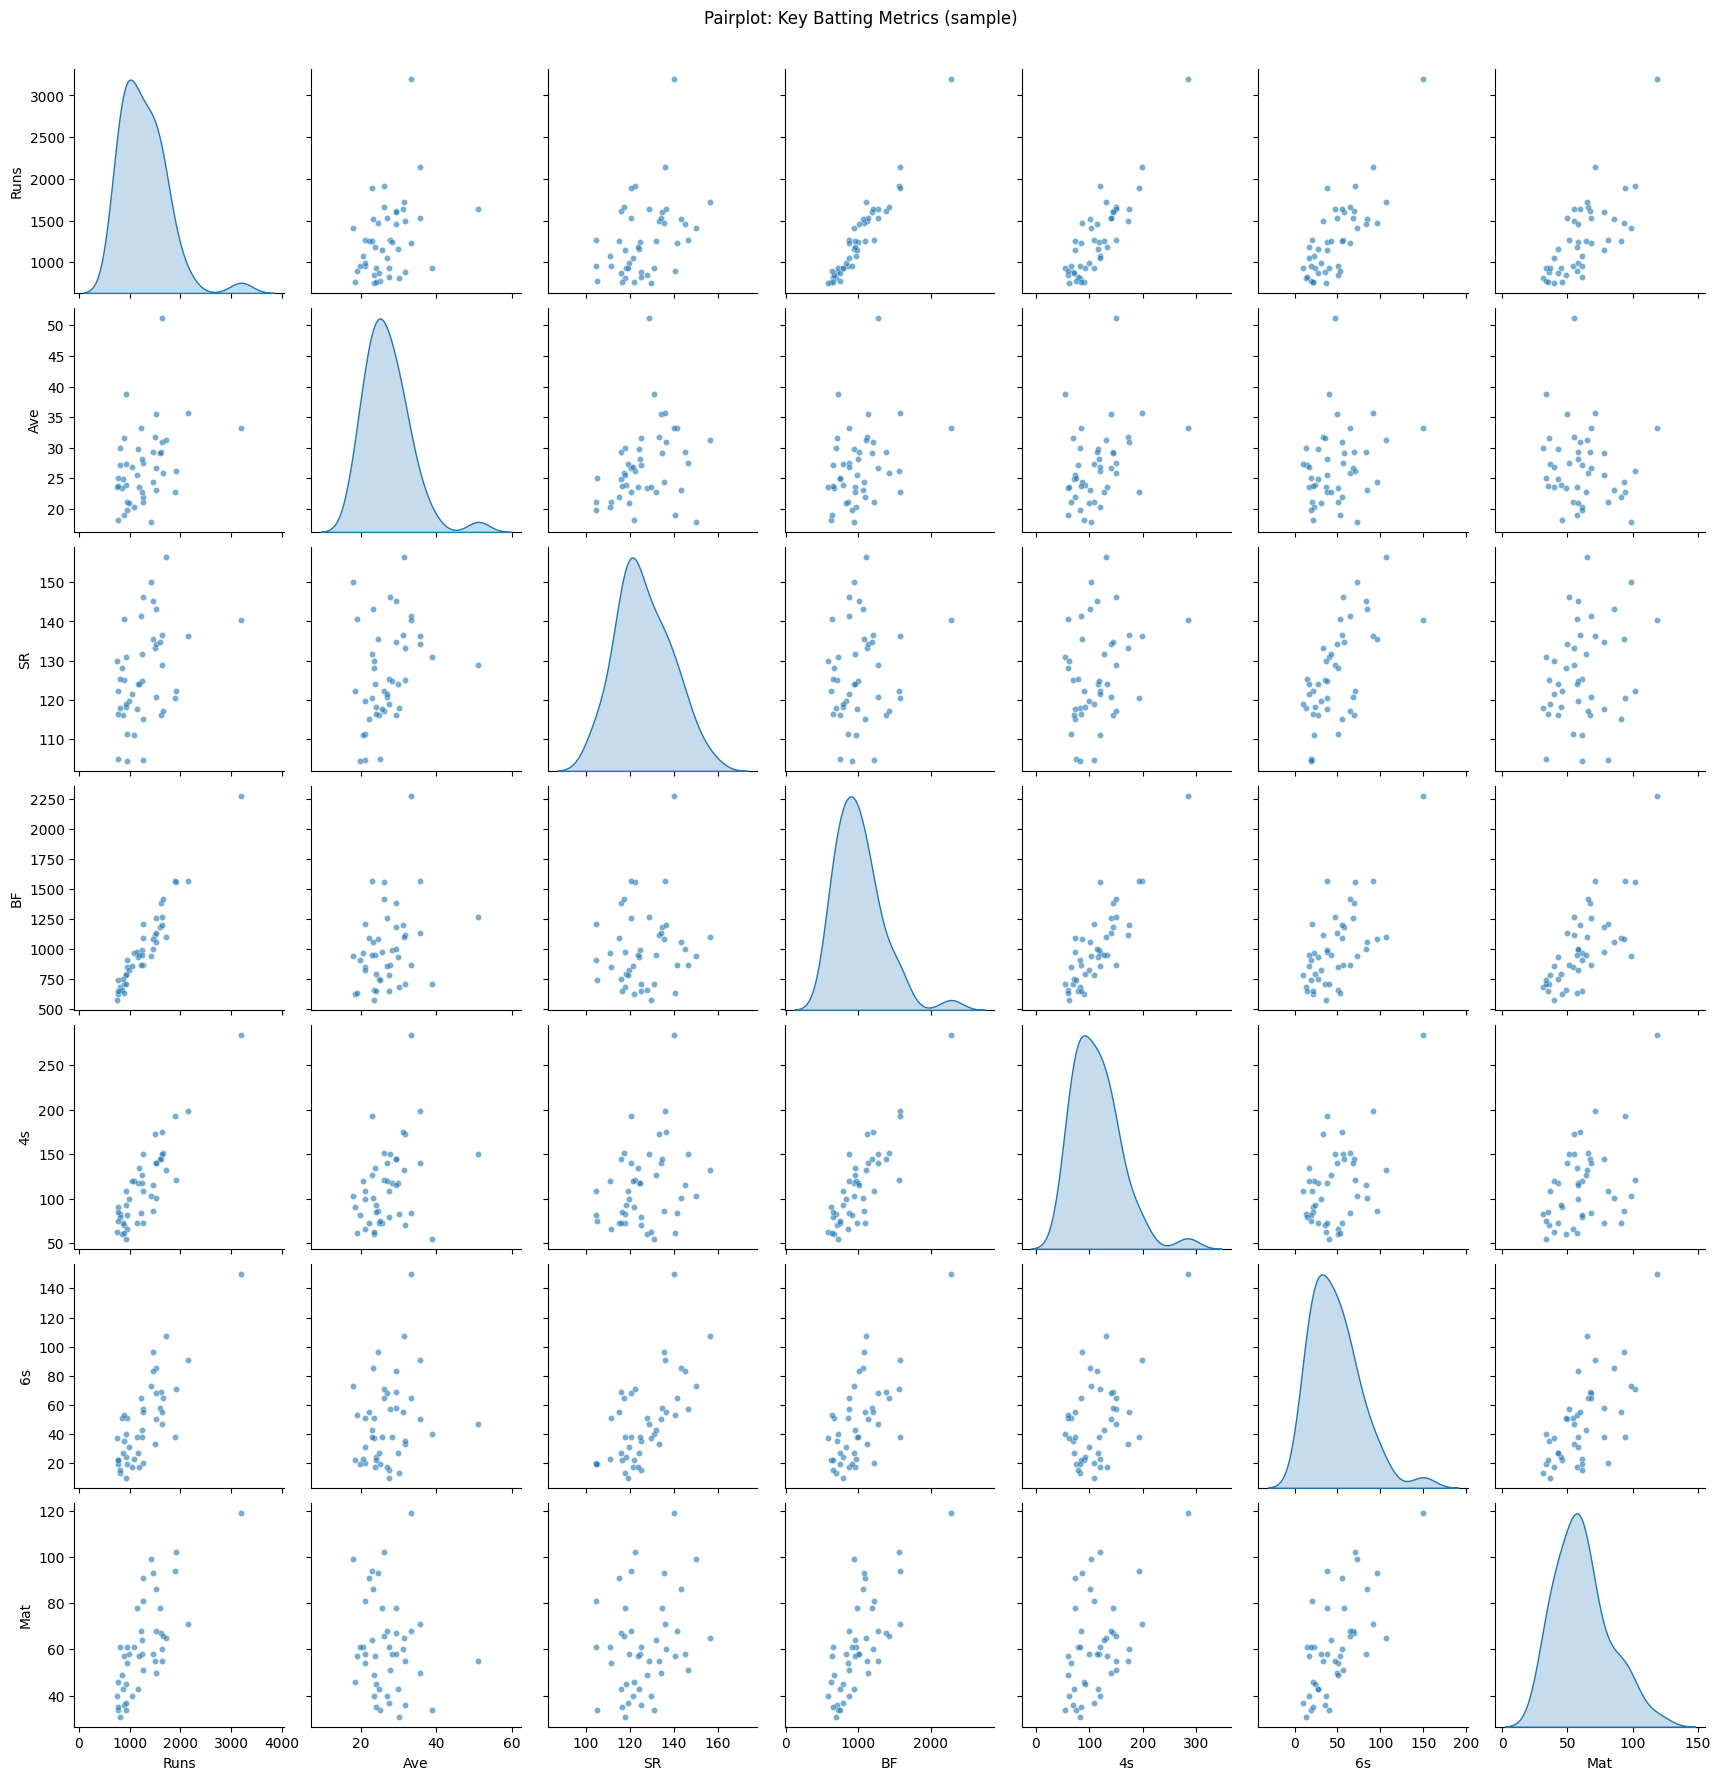


Top correlated metric pairs (|r| > 0.5):
metric1 metric2    abs_r
    Mat    Inns 0.983992
   Runs      BF 0.975187
   Runs      4s 0.922809
     BF      4s 0.907793
     50      4s 0.854782
   Inns      BF 0.846581
   Runs      50 0.844950
   Inns    Runs 0.830700
    Mat      BF 0.800885
     BF      50 0.799962

Saved heatmap and pairplot to dataset/eda_plots/, and CSVs with correlation & p-values.


In [ ]:
# (Removed detailed correlation analysis — use concise visuals for slides.)
pass

## Bowling Data Overview (twbo.csv)

In [5]:
# Bowling data head, info, describe
twbo.head(), twbo.info(), twbo.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        181 non-null    object 
 1   Span          181 non-null    object 
 2   Mat           181 non-null    int64  
 3   Inns          181 non-null    int64  
 4   Overs         181 non-null    float64
 5   Mdns          181 non-null    int64  
 6   Runs          181 non-null    int64  
 7   Wkts          181 non-null    int64  
 8   BBI           181 non-null    object 
 9   Ave           181 non-null    float64
 10  Econ          181 non-null    float64
 11  SR            181 non-null    float64
 12  4             181 non-null    int64  
 13  5             181 non-null    int64  
 14  Bowling_Type  181 non-null    object 
 15  Role          181 non-null    object 
dtypes: float64(4), int64(7), object(5)
memory usage: 22.8+ KB


(                    Player       Span  Mat  Inns  Overs  Mdns  Runs  Wkts  \
 0    Shakib Al Hasan (BAN)  2006-2021   94    93  347.3     3  2316   117   
 1          TG Southee (NZ)  2008-2021   92    90  332.5     2  2729   111   
 2          SL Malinga (SL)  2006-2020   84    83  299.5     1  2225   107   
 3    Rashid Khan (AFG/ICC)  2015-2021   56    56  211.2     1  1312   103   
 4  Shahid Afridi (ICC/PAK)  2006-2018   99    97  361.2     4  2396    98   
 
     BBI    Ave  Econ    SR  4  5 Bowling_Type                  Role  
 0  5/20  19.79  6.66  17.8  5  1     Off spin    Opener,All-rounder  
 1  5/18  24.58  8.19  17.9  1  1         Fast                Bowler  
 2   5/6  20.79  7.42  16.8  1  2         Fast                Bowler  
 3   5/3  12.73  6.20  12.3  4  2     Leg spin                Bowler  
 4  4/11  24.44  6.63  22.1  3  0     Leg spin  All-rounder,Finisher  ,
 None,
               Mat        Inns       Overs        Mdns         Runs  \
 count  181.000000  181.0

In [6]:
# Check for missing values in bowling data
twbo.isnull().sum()

Player          0
Span            0
Mat             0
Inns            0
Overs           0
Mdns            0
Runs            0
Wkts            0
BBI             0
Ave             0
Econ            0
SR              0
4               0
5               0
Bowling_Type    0
Role            0
dtype: int64

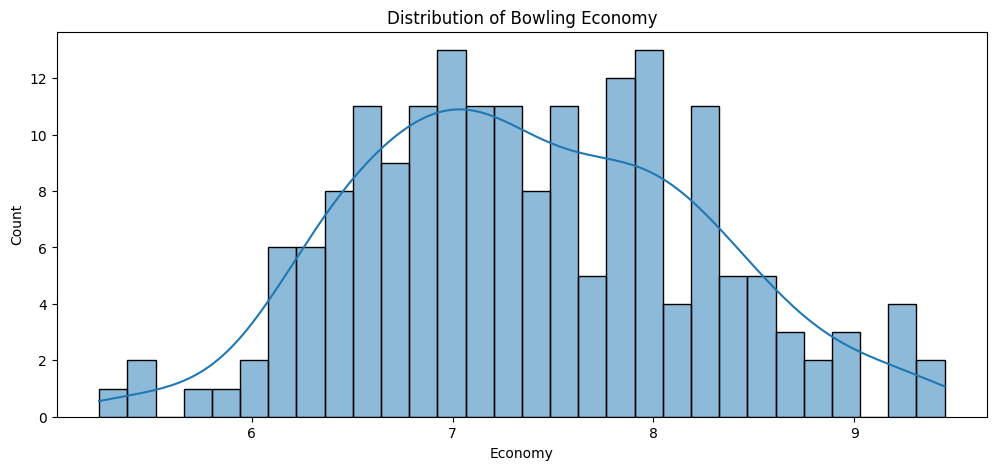

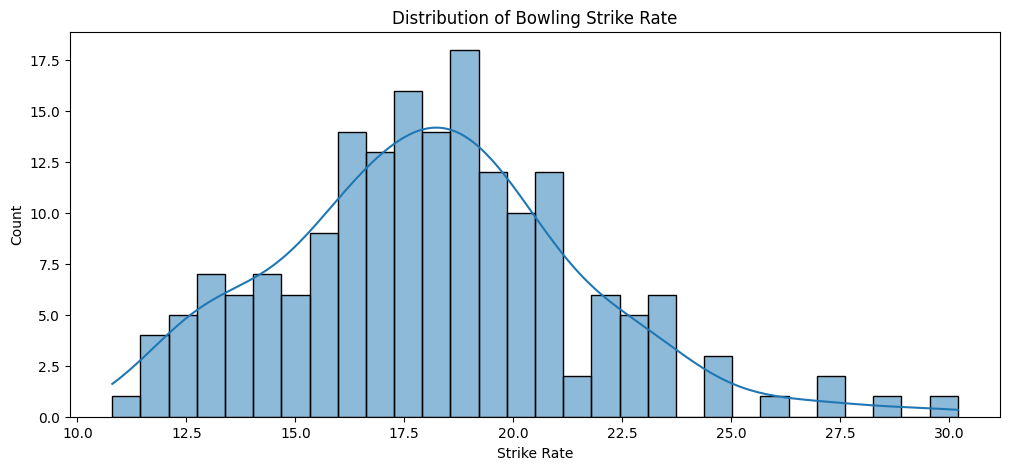

In [9]:
# Bowling: Distribution of Economy and Strike Rate
plt.figure(figsize=(12,5))
sns.histplot(twbo['Econ'].dropna(), kde=True, bins=30)
plt.title('Distribution of Bowling Economy')
plt.xlabel('Economy')
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(twbo['SR'].dropna(), kde=True, bins=30)
plt.title('Distribution of Bowling Strike Rate')
plt.xlabel('Strike Rate')
plt.show()

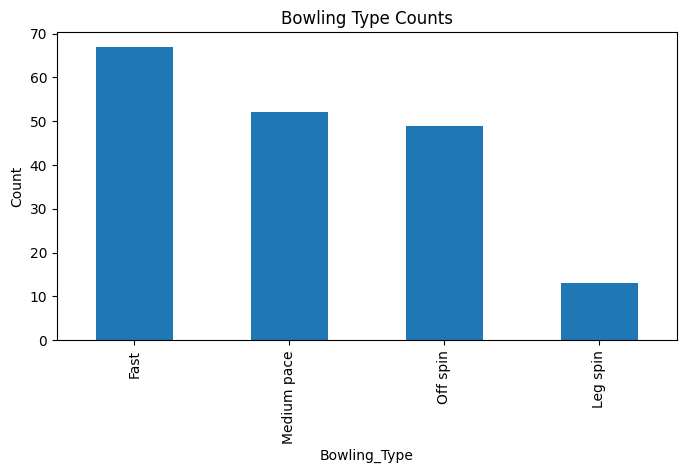

In [10]:
# Bowling: Bowling_Type counts
bowling_type_counts = twbo['Bowling_Type'].value_counts()
bowling_type_counts.plot(kind='bar', figsize=(8,4), title='Bowling Type Counts')
plt.ylabel('Count')
plt.show()

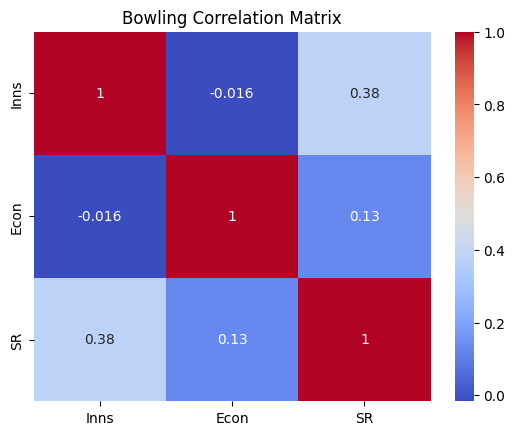

In [11]:
# Bowling: Correlation matrix
corr_bowl = twbo[['Inns','Econ','SR']].corr()
sns.heatmap(corr_bowl, annot=True, cmap='coolwarm')
plt.title('Bowling Correlation Matrix')
plt.show()

# Slide-ready Key Insights (concise)
- Runs and Wickets are right-skewed: a few top players dominate totals — use median or per-match rates to compare fairly. ✅
- Openers show higher aggregate Runs/BF; use `Runs + BF + boundaries` to model scoring volume. 🔧
- Average and Strike Rate both matter: treat them as complementary (efficiency vs aggressiveness). ⚖️
- Fast bowlers are most common; top wicket-takers have distinguishable Economies and SRs (consider role when comparing). 🎯
- Actionable: transform skewed metrics (log/winsorize) for models, resolve Unknown Role/Bowling_Type rows for accurate role-based stats, and use the saved slide images in `dataset/eda_slide_imgs/`. ✨